In [111]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from cmcrameri import cm
import datetime
import pandas as pd
import geopandas
from shapely.geometry import Point
import fiona
import matplotlib.pyplot as plt

os.chdir('/users/marianne/documents/ICB')

In [81]:
'''name = ['Forest','Shrub','Wetland']
letter = ['A','B','C']
lat = [37.675495,
        37.676544,
        37.675441]
lon = [-119.564904, 
        -119.565413,
        -119.566771]
easting = [273800.31,	
        273758.60,
        273635.47
]
northing = [4172907.15,
        4173024.79,
        4172905.67
]
elev = [2113,
        2110,
        2095]
cover = ['Mixed Conifer',
        'Ceanothus cordulatus',
        'wetland vegetation']
icb_meta = pd.DataFrame({'name':name,
                        'letter':letter,
                        'lat':lat,
                        'lon':lon,
                        'elev':elev,
                        'cover':cover})

pd.to_pickle(icb_meta,'./icb_metadata.pkl')
'''
icb_meta = pd.read_pickle('./icb_metadata.pkl')

In [206]:
## read in camera-derived fsca data
data = pd.read_csv('data/cam_sca.csv')
## make it into a dataframe
keys = data.keys()
date_format = "%d-%b-%y"
sites = []
cameras = []
pixels = []
percents = []
dates = []
for i in range(int(len(data.keys())/3)):
    ii = i*3
    camera = keys[ii]
    site = keys[ii+1]
    pixel = data[camera][1:]
    percent = data[site][1:]
    datea = data[keys[ii+2]][1:]
    mask = ~np.isnan(pixel.astype('float'))
    datea = datea[mask]
    date = [datetime.datetime.strptime(d,date_format) for d in datea]

    sites.append(site)
    cameras.append(camera)
    pixels.append(pixel.astype('float')[mask])
    percents.append(percent.astype('float')[mask])
    dates.append(date)



camera_sca = pd.DataFrame({'site':sites,
                    'camera':cameras,
                    'pixels':pixels,
                    'percent':percents,
                    'dt':dates,
                    'description': ['shrubs in forest gap','bare forest gap','shrub field', 'wetland','shrub','forest']
                    })



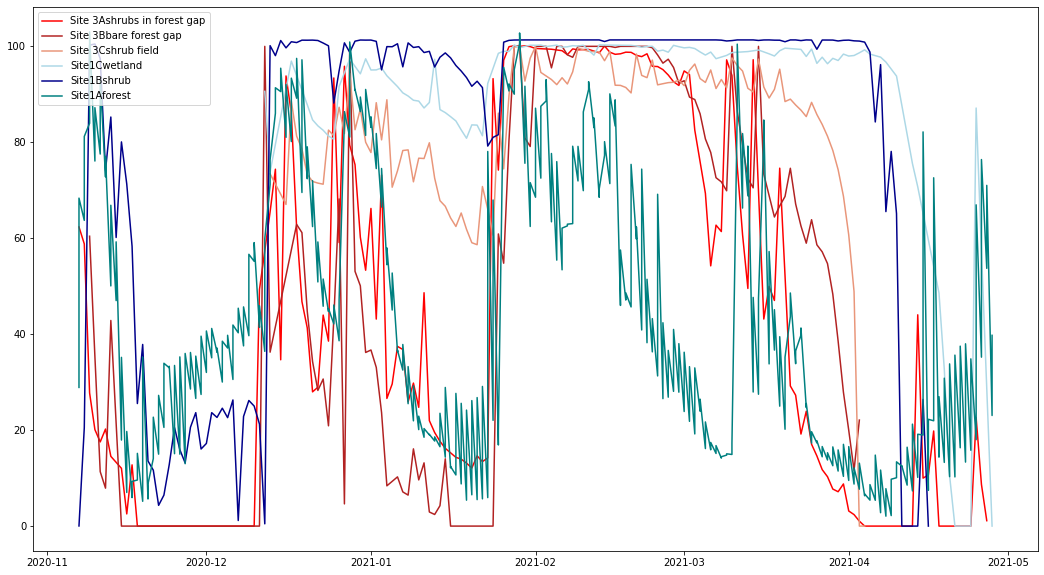

In [208]:
colors = ['red','firebrick','darksalmon','lightblue','darkblue','teal']
fig,ax = plt.subplots(figsize=(18,10))
for i,s in enumerate(camera_sca.site):
    dt = camera_sca['dt'][i]
    percent = camera_sca['percent'][i]
    ax.plot(dt,percent,label = s+camera_sca['description'][i],color=colors[i])

ax.legend()
plt.show()
    

1      62.352
2      58.825
3      27.749
4      20.107
5      17.547
        ...  
688       NaN
689       NaN
690       NaN
691       NaN
692       NaN
Name: Site 3A, Length: 692, dtype: float64

In [155]:
# date_format = "%m/%d"
datea = data.Cam0167_date[1:]
mask = ~np.isnan(data['Site 3A'][1:].astype('float'))
datea = datea[mask]
tmp = [datetime.datetime.strptime(d,date_format) for d in datea]

In [156]:
tmp

[datetime.datetime(2020, 11, 7, 0, 0),
 datetime.datetime(2020, 11, 8, 0, 0),
 datetime.datetime(2020, 11, 9, 0, 0),
 datetime.datetime(2020, 11, 10, 0, 0),
 datetime.datetime(2020, 11, 11, 0, 0),
 datetime.datetime(2020, 11, 12, 0, 0),
 datetime.datetime(2020, 11, 13, 0, 0),
 datetime.datetime(2020, 11, 15, 0, 0),
 datetime.datetime(2020, 11, 16, 0, 0),
 datetime.datetime(2020, 11, 17, 0, 0),
 datetime.datetime(2020, 11, 18, 0, 0),
 datetime.datetime(2020, 11, 19, 0, 0),
 datetime.datetime(2020, 11, 20, 0, 0),
 datetime.datetime(2020, 11, 21, 0, 0),
 datetime.datetime(2020, 11, 22, 0, 0),
 datetime.datetime(2020, 11, 23, 0, 0),
 datetime.datetime(2020, 11, 24, 0, 0),
 datetime.datetime(2020, 11, 25, 0, 0),
 datetime.datetime(2020, 11, 26, 0, 0),
 datetime.datetime(2020, 11, 27, 0, 0),
 datetime.datetime(2020, 11, 28, 0, 0),
 datetime.datetime(2020, 11, 29, 0, 0),
 datetime.datetime(2020, 11, 30, 0, 0),
 datetime.datetime(2020, 12, 1, 0, 0),
 datetime.datetime(2020, 12, 2, 0, 0),
 date

In [143]:
all = data.Cam0167_date[1:]
for a in all:
    if a==all[688]: print(a)

In [135]:
all2 = all.astype('string')

In [152]:
np.isnan(data['Site 3A'][1:].astype('float'))

1      False
2      False
3      False
4      False
5      False
       ...  
688     True
689     True
690     True
691     True
692     True
Name: Site 3A, Length: 692, dtype: bool

In [119]:
data.Cam0167_date[1]

'7-Nov-20'

In [77]:
##  read in manual snow depths from march 2022 trip
grid_2022 = pd.read_csv('data/wetland_march2022.csv')
geometry = [Point(xy) for xy in zip(grid_2022.iloc[:, 2], grid_2022.iloc[:, 3])]
gdf_2022 = geopandas.GeoDataFrame(grid_2022, geometry=geometry)

<AxesSubplot:>

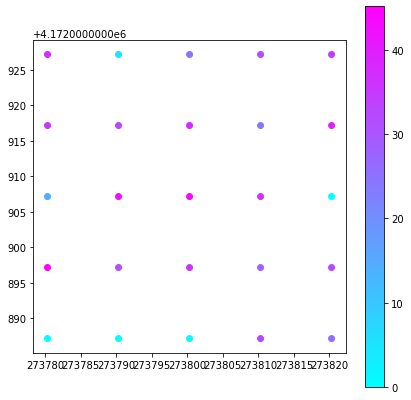

In [78]:
df = pd.read_csv('data/Gridded_Snow_Depths/snowgrid_march16.csv')
df1=df.interpolate()
geometry = [Point(xy) for xy in zip(df.iloc[:, 0], df.iloc[:, 1])]
gdf = geopandas.GeoDataFrame(df, geometry=geometry)
from matplotlib import cm
fig,ax=plt.subplots(figsize=(7,7))
gdf_2022.plot(column='avg',cmap = 'cool',ax=ax,legend=True,label='Snow Depth [cm]')

In [54]:
# observed fsca . this should not-count anything that has nan values for the snow cover.
# this is within the actual grid, which is much smaller than the modis pixel
# what is the date for these values? 3/21/16
for g in np.unique(gdf.Grid):
    data = gdf.where(gdf.Grid == g).Average_cm
    have_snow = len(data[data>0])
    no_snow = len(data[data<=0])
    print(str(g) + ': '+ str(have_snow/(have_snow + no_snow)))

A: 0.6744186046511628
B: 0.9848484848484849
C: 0.9797979797979798


In [23]:
modisA = pd.read_csv('data/modis_fsca_A.csv')
modisB = pd.read_csv('data/modis_fsca_B.csv')
modisC = pd.read_csv('data/modis_fsca_C.csv')

def add_dt(df):
    tmp = [datetime.datetime.strptime(val,'%b %d, %Y') for val in df['system:time_start']]
    df['dt'] = tmp

In [67]:
np.nanmean(gdf.loc[gdf.Grid=='A'].lat_UTM11)

4172907.8577209287

In [25]:
add_dt(modisA)
add_dt(modisB)
add_dt(modisC)

(16801.0, 16953.0)

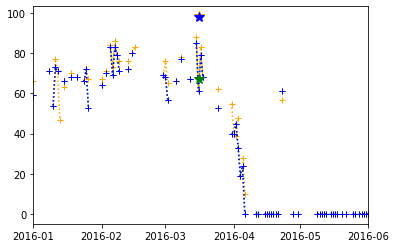

In [47]:
fig,ax=plt.subplots()
ax.plot(modisA.dt,modisA.NDSI_Snow_Cover,'+:',color='green')
ax.plot(modisB.dt, modisB.NDSI_Snow_Cover,'+:',color='orange')
ax.plot(modisC.dt, modisC.NDSI_Snow_Cover,'+:',color='blue')

ax.plot(datetime.datetime(2016,3,16,0,0,0),0.6744186046511628*100,'*',color='green',markersize=10)
ax.plot(datetime.datetime(2016,3,16,0,0,0),0.9848484848484849*100,'*',color='orange',markersize=10)
ax.plot(datetime.datetime(2016,3,16,0,0,0),0.9797979797979798*100,'*',color='blue',markersize=10)


ax.set_xlim(datetime.datetime(2016,1,1),datetime.datetime(2016,6,1))
## a and b are in the same pixel. c is very similar but not identical.

<AxesSubplot:>

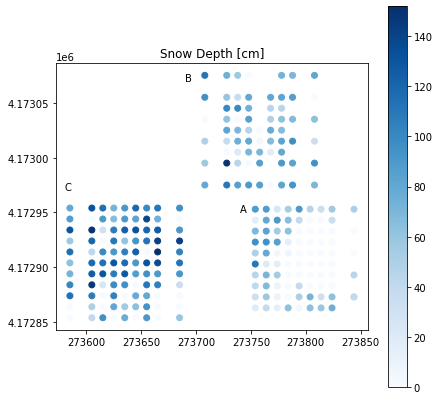

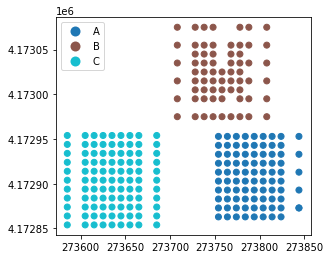

In [210]:
from matplotlib import cm
# gdf.plot(column='Observed Fire Severity', categorical = True,cmap = 'viridis',markersize=100)

fig,ax=plt.subplots(figsize=(7,7))
gdf.plot(column='cm',cmap = 'Blues',ax=ax,legend=True,label='Snow Depth [cm]')
ax.text(273740,4172950,'A')
ax.text(273690,4173070,'B')
ax.text(273580,4172970,'C')
ax.set_title('Snow Depth [cm]')
gdf.plot(column='Grid',categorical=True,legend=True)


# gdf_2022.plot(column='avg',cmap = 'Blues',ax=ax,legend=True,label='Snow Depth [cm]')
# fig.colorbar(cm.ScalarMappable(norm=None,cmap='viridis'))
# fig.colorbar(d)
#gdf.plot(column='Grid',cmap = 'viridis')

# gdf.plot(x= 'Average_cm',y= 'cm_mid',cmap = 'viridis',ax=ax,kind='hexbin')

# plt.savefig('raster.tiff')


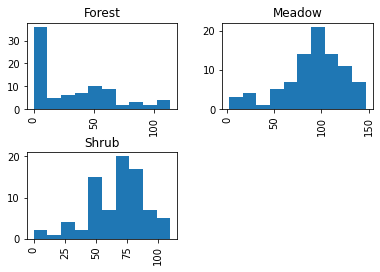

In [80]:
gdf.hist(column='Average_cm',by='Dominant Vegetation')
plt.show()

In [61]:
df_shrub = pd.read_csv('Gridded_Snow_Depths/shrub_grid_2020.csv')
df1_shrub=df_shrub.interpolate()
geometry = [Point(xy) for xy in zip(df_shrub.iloc[:, 0], df_shrub.iloc[:, 1])]
gdf_shrub = geopandas.GeoDataFrame(df_shrub, geometry=geometry)
gdf_shrub['cm_avg'] = gdf_shrub[['cm','cm.1','cm.2','cm.3','cm.4']].mean(axis=1)

<AxesSubplot:>

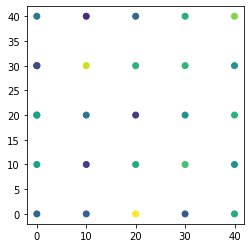

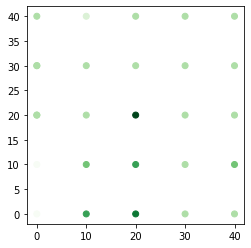

In [64]:
gdf_shrub.plot(column='cm_avg',cmap = 'viridis')
gdf_shrub.plot(column='Coverage',cmap = 'Greens',categorical=True)

In [65]:
df_meadow = pd.read_csv('Gridded_Snow_Depths/meadow_grid_2020.csv')
df1_meadow=df_meadow.interpolate()
geometry = [Point(xy) for xy in zip(df_meadow.iloc[:, 0], df_meadow.iloc[:, 1])]
gdf_meadow = geopandas.GeoDataFrame(df_meadow, geometry=geometry)
gdf_meadow['cm_avg'] = gdf_meadow[['cm','cm.1','cm.2','cm.3','cm.4']].mean(axis=1)

<AxesSubplot:>

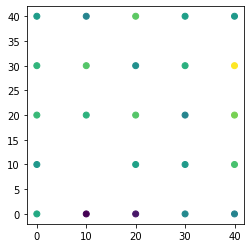

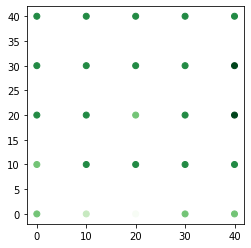

In [67]:
gdf_meadow.plot(column='cm_avg',cmap = 'viridis')
gdf_meadow.plot(column='Coverage',cmap = 'Greens',categorical=True)

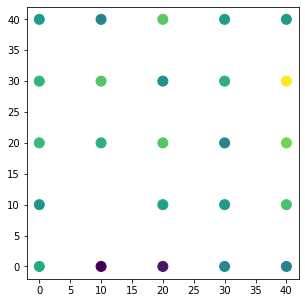

In [83]:
colors = ['red','yellow', 'blue','purple','black']
labels = ['deadtrees', 'livetrees', 'logs','open','smalltrees']
fig,ax=plt.subplots(figsize=(5,5))
gdf_meadow.plot(column='cm_avg',ax=ax,markersize=100)
plt.show()